In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('datos_purgados.csv',sep=';')

In [ ]:
df.head(8)
df.tail(6)
df.sample(6)

,FECHA_CORTE,N_SEC,UBIGEO,REG_NAT,DEPARTAMENTO,PROVINCIA,DISTRITO,POB_TOTAL,POB_URBANA,POB_RURAL,QRESIDUOS_MUN,QRESIDUOS _VAL_INORGAN,PERIODO,RESIDUOS_PER_CAPITA,RESIDUOS_URBANO,RESIDUOS_RURAL
239,20241212,7021,150703,SIERRA,LIMA,HUAROCHIRI,CALLAHUANCA,632.0,507.0,125.0,150.69,0.0,2022,0.238434,120.885807,29.804193
223,20241212,6848,130610,SIERRA,LA LIBERTAD,OTUZCO,PARANDAY,530.0,120.0,410.0,27.86,0.0,2022,0.052566,6.307925,21.552075
241,20241212,7024,150706,SIERRA,LIMA,HUAROCHIRI,CUENCA,470.0,119.0,351.0,27.63,0.0,2022,0.058787,6.995681,20.634319
476,20241212,8211,61203,SIERRA,CAJAMARCA,SAN PABLO,SAN LUIS,815.0,164.0,651.0,37.89,0.0,2023,0.046491,7.624491,30.265509
352,20241212,7640,20503,SIERRA,ANCASH,BOLOGNESI,ANTONIO RAYMONDI,927.0,290.0,637.0,66.99,0.0,2023,0.072265,20.956958,46.033042
58,20241212,5834,21408,SIERRA,ÁNCASH,OCROS,SAN CRISTOBAL DE RAJAN,383.0,282.0,101.0,65.48,0.0,2022,0.170966,48.212428,17.267572


In [ ]:
df.columns

Index(['FECHA_CORTE', 'N_SEC', 'UBIGEO', 'REG_NAT', 'DEPARTAMENTO',
       'PROVINCIA', 'DISTRITO', 'POB_TOTAL', 'POB_URBANA', 'POB_RURAL',
       'QRESIDUOS_MUN', 'QRESIDUOS _VAL_INORGAN', 'PERIODO',
       'RESIDUOS_PER_CAPITA', 'RESIDUOS_URBANO', 'RESIDUOS_RURAL'],
      dtype='object')

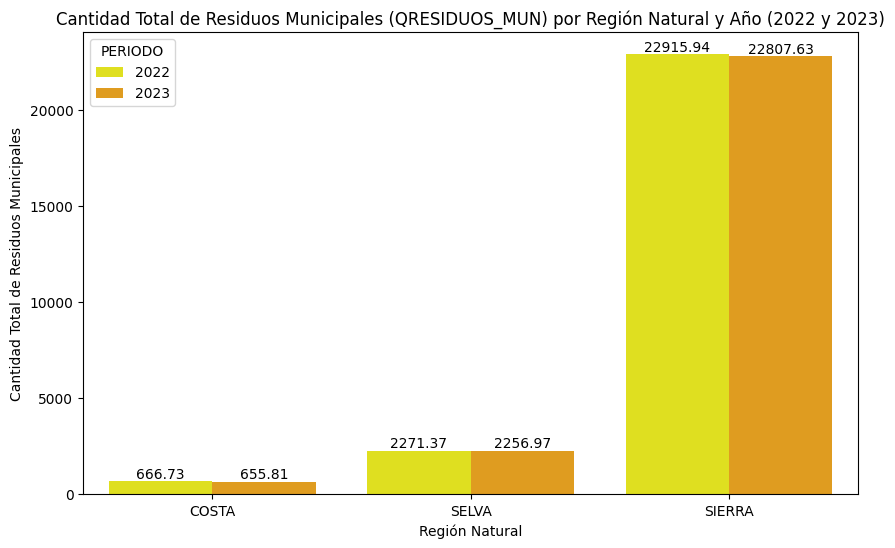

In [ ]:
# Filter data for the years 2022 and 2023
df_filtered = df[df['PERIODO'].isin([2022, 2023])]

# Group by natural region and year and sum the municipal waste
grouped_data = df_filtered.groupby(['REG_NAT', 'PERIODO'])['QRESIDUOS_MUN'].sum().reset_index()

# Define a custom color palette
colors = {2022: 'yellow', 2023: 'orange'} # Changed color for 2022 to light blue

# Create a bar chart with custom colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_data, x='REG_NAT', y='QRESIDUOS_MUN', hue='PERIODO', palette=colors)
plt.title('Cantidad Total de Residuos Municipales (QRESIDUOS_MUN) por Región Natural y Año (2022 y 2023)')
plt.xlabel('Región Natural')
plt.ylabel('Cantidad Total de Residuos Municipales')

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()